#TASK1
- % 수치로 나타난 특성들을 활용하여 선수 분류 모델 학습 및 시각화

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('F:\Python\FlyAI_Project\Data\RawData\GameStats\LCK_2023_SPRING.csv')

## 2. 데이터 전처리
### Feature Selection
- % 데이터 특성 추출
- GOLD%, Vision Score, VS%, DMG%, KP%


### 포지션 분리


In [19]:
df

,Player,Champion,Role,Level,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,CS in Enemy Jungle,CSM,Golds,GPM,GOLD%,Vision Score,Wards placed,Wards destroyed,Control Wards Purchased,Detector Wards Placed,VSPM,WPM,VWPM,WCPM,VS%,Total damage to Champion,Physical Damage,Magic Damage,True Damage,DPM,DMG%,K+A Per Minute,KP%,Solo kills,Double kills,Triple kills,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Objectives Stolen,Damage dealt to turrets,Damage dealt to buildings,Total heal,Total Heals On Teammates,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,Kiin,Renekton,TOP,16,4,2,5,4.5,251,8,NaN,9.2,11998,441,21.4%,30,11,6,5,5,1.10,0.40,0.18,0.22,12.9%,13966,12060,1671,235,513,25%,0.33,56.3%,2.0,1,0,0,0,2014,40,2027,1,0,2715,2715,8085,0,22784,0,13,59,24318,95,7,30,0,300
1,Cuzz,Sejuani,JUNGLE,14,4,0,7,Perfect KDA,184,165,NaN,6.8,10677,393,19%,60,8,16,8,8,2.21,0.29,0.29,0.59,25.9%,10358,6302,3148,908,381,18.5%,0.40,68.8%,1.0,0,0,0,0,1162,24,1277,2,0,213,213,14250,998,36143,0,18,324,27195,0,9,26,0,0
2,Bdd,Veigar,MID,17,2,0,5,Perfect KDA,275,0,NaN,10.1,12378,455,22%,30,6,4,4,4,1.10,0.22,0.15,0.15,12.9%,10021,609,9317,95,368,17.9%,0.26,43.8%,NaN,0,0,0,0,92,-19,-685,-1,0,9368,9368,2322,0,5390,0,14,62,6262,0,6,20,0,0
3,Aiming,Zeri,ADC,15,6,0,6,Perfect KDA,299,35,NaN,11.0,13998,515,24.9%,44,13,12,3,3,1.62,0.48,0.11,0.44,19%,18308,11840,5010,1458,673,32.7%,0.44,75%,1.0,2,0,0,0,1295,18,888,1,0,8379,8379,1567,0,14442,0,10,289,6169,0,5,23,0,0
4,Lehends,Lulu,SUPPORT,12,0,0,11,Perfect KDA,17,0,NaN,0.6,7131,262,12.7%,68,35,9,12,10,2.50,1.29,0.44,0.33,29.3%,3281,777,2349,155,121,5.9%,0.40,68.8%,NaN,0,0,0,0,357,-19,383,1,0,981,981,639,451,2924,4046,17,222,2985,0,15,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,Rascal,Jax,TOP,17,3,3,1,1.3,295,20,NaN,8.2,14942,413,25.8%,33,12,6,5,4,0.91,0.33,0.14,0.17,12%,15601,9639,5962,0,431,20.9%,0.11,100%,NaN,1,0,0,0,-303,-1,-298,0,0,5427,5427,7233,0,30573,0,11,140,35437,81,6,23,1350,100
2186,Croco,Maokai,JUNGLE,14,0,5,3,0.6,142,128,NaN,3.9,9490,262,16.4%,47,11,10,9,9,1.30,0.30,0.25,0.28,17.2%,16326,461,13594,2271,451,21.9%,0.08,75%,NaN,0,0,0,0,-141,5,-458,0,1,0,0,7581,1407,26599,0,36,489,36587,163,10,27,0,0
2187,FATE,Viktor,MID,16,1,3,0,0.3,308,0,NaN,8.5,12160,336,21%,41,15,5,9,7,1.13,0.41,0.25,0.14,15%,24748,127,24396,225,684,33.1%,0.03,25%,NaN,0,0,0,0,54,9,249,0,0,0,0,2,0,20754,0,15,316,17286,114,10,29,0,0
2188,deokdam,Zeri,ADC,16,0,3,1,0.3,357,46,NaN,9.9,14010,387,24.2%,51,12,12,4,3,1.41,0.33,0.11,0.33,18.6%,14287,9886,4401,0,395,19.1%,0.03,25%,NaN,0,0,0,0,-222,3,198,0,0,3357,3357,2651,768,20287,0,2,182,18196,107,7,25,0,0


In [5]:
df_percent = df[['Player','Kills','Deaths','Assists','Role','GOLD%','VS%','DMG%','KP%','XPD@15']]

In [6]:
df_percent['GOLD%'] = df_percent['GOLD%'].str.replace('%', '').astype(float)
df_percent['VS%'] = df_percent['VS%'].str.replace('%', '').astype(float)
df_percent['DMG%'] = df_percent['DMG%'].str.replace('%', '').astype(float)
df_percent['KP%'] = df_percent['KP%'].str.replace('%', '').astype(float)

C:\Users\jongwan\AppData\Local\Temp\ipykernel_25736\3653973450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percent['GOLD%'] = df_percent['GOLD%'].str.replace('%', '').astype(float)
C:\Users\jongwan\AppData\Local\Temp\ipykernel_25736\3653973450.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percent['VS%'] = df_percent['VS%'].str.replace('%', '').astype(float)
C:\Users\jongwan\AppData\Local\Temp\ipykernel_25736\3653973450.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy 

In [7]:
df_percent.head()

,Player,Kills,Deaths,Assists,Role,GOLD%,VS%,DMG%,KP%,XPD@15
0,Kiin,4,2,5,TOP,21.4,12.9,25.0,56.3,2027
1,Cuzz,4,0,7,JUNGLE,19.0,25.9,18.5,68.8,1277
2,Bdd,2,0,5,MID,22.0,12.9,17.9,43.8,-685
3,Aiming,6,0,6,ADC,24.9,19.0,32.7,75.0,888
4,Lehends,0,0,11,SUPPORT,12.7,29.3,5.9,68.8,383


In [8]:
df_percent['kda'] = (df_percent['Kills'] + df_percent['Assists']) / (1 + df_percent['Deaths'])

C:\Users\jongwan\AppData\Local\Temp\ipykernel_25736\2749777756.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percent['kda'] = (df_percent['Kills'] + df_percent['Assists']) / (1 + df_percent['Deaths'])


In [9]:
df_raw = df_percent[['Player','Role','GOLD%','VS%','DMG%','KP%','XPD@15']]

In [16]:
df_raw

,Player,Role,GOLD%,VS%,DMG%,KP%,XPD@15
0,Kiin,TOP,21.4,12.9,25.0,56.3,2027
1,Cuzz,JUNGLE,19.0,25.9,18.5,68.8,1277
2,Bdd,MID,22.0,12.9,17.9,43.8,-685
3,Aiming,ADC,24.9,19.0,32.7,75.0,888
4,Lehends,SUPPORT,12.7,29.3,5.9,68.8,383
...,...,...,...,...,...,...,...
2185,Rascal,TOP,25.8,12.0,20.9,100.0,-298
2186,Croco,JUNGLE,16.4,17.2,21.9,75.0,-458
2187,FATE,MID,21.0,15.0,33.1,25.0,249
2188,deokdam,ADC,24.2,18.6,19.1,25.0,198


In [11]:
df_TOP = df_raw.loc[df_raw['Role'] == 'TOP']
df_JUNGLE = df_raw.loc[df_raw['Role'] == 'JUNGLE']
df_MID = df_raw.loc[df_raw['Role'] == 'MID']
df_ADC = df_raw.loc[df_raw['Role'] == 'ADC']
df_SUPPORT = df_raw.loc[df_raw['Role'] == 'SUPPORT']

#2-1. 시각화
- 선수의 모든 데이터를 평균 쳐야함
- 이름, 특성1 평균, 특성2 평균 , 특성3 평균 구조

In [12]:
df_TOP.head()

,Player,Role,GOLD%,VS%,DMG%,KP%,XPD@15
0,Kiin,TOP,21.4,12.9,25.0,56.3,2027
5,Rascal,TOP,21.5,12.2,25.4,50.0,-2027
10,Kiin,TOP,23.5,13.8,24.3,80.0,1554
15,Rascal,TOP,23.6,13.7,24.8,40.0,-1554
20,Zeus,TOP,18.5,14.4,26.0,42.9,205


In [13]:
df_TOP['Player'].unique()

array(['Kiin', 'Rascal', 'Zeus', 'DnDn', 'Doran', 'Canna', 'kingen',
       'Burdol', 'Morgan', 'DuDu', 'Weizor', 'Jaguar'], dtype=object)

In [14]:
average_stats = df_TOP.groupby('Player',as_index=False).mean()

C:\Users\jongwan\AppData\Local\Temp\ipykernel_25736\3165183995.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_stats = df_TOP.groupby('Player',as_index=False).mean()


In [49]:
average_stats

,Player,GOLD%,VS%,DMG%,KP%,XPD@15
0,Burdol,20.534783,11.582609,22.100000,49.304348,-322.043478
1,Canna,20.882500,12.030000,21.887500,51.847500,87.375000
2,Clear,19.582353,10.618750,20.588235,52.676471,88.687500
3,DnDn,20.869767,13.083721,23.865116,44.809302,-366.255814
4,Doran,21.561538,11.035897,23.807692,55.333333,147.897436
5,DuDu,22.184211,11.702632,24.500000,59.052632,134.315789
6,Frog,22.100000,10.300000,11.300000,58.300000,-553.000000
7,Kiin,21.427500,12.407500,23.140000,57.590000,205.325000
8,Mihile,24.200000,11.200000,24.500000,60.000000,553.000000
9,Morgan,22.291111,13.102222,25.068889,52.028889,-60.088889


In [24]:
df = pd.DataFrame(average_stats)
df.set_index("Player", inplace=True)
from sklearn.preprocessing import MinMaxScaler
# Min-Max 스케일링 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

print(scaled_df)

           GOLD%       VS%      DMG%       KP%    XPD@15
Player                                                  
Burdol  0.123805  0.431928  0.215616  0.470794  0.411896
Canna   0.046848  0.403053  0.071322  0.575463  0.558258
DnDn    0.118957  0.690344  0.234307  0.653439  0.446809
Doran   0.085073  0.431513  0.213864  0.778208  0.561592
DuDu    0.248355  0.000000  0.118421  0.687088  0.491389
Jaguar  0.111534  0.722089  0.013158  0.000000  0.000000
Kiin    0.169171  0.857632  0.264354  0.609658  0.635238
Morgan  0.159359  1.000000  0.141882  0.599011  0.419858
Rascal  0.280867  0.571445  0.235673  0.814657  0.422587
Weizor  1.000000  0.188776  1.000000  1.000000  1.000000
Zeus    0.176783  0.994946  0.228469  0.552379  0.598039
kingen  0.000000  0.248879  0.000000  0.540741  0.470780


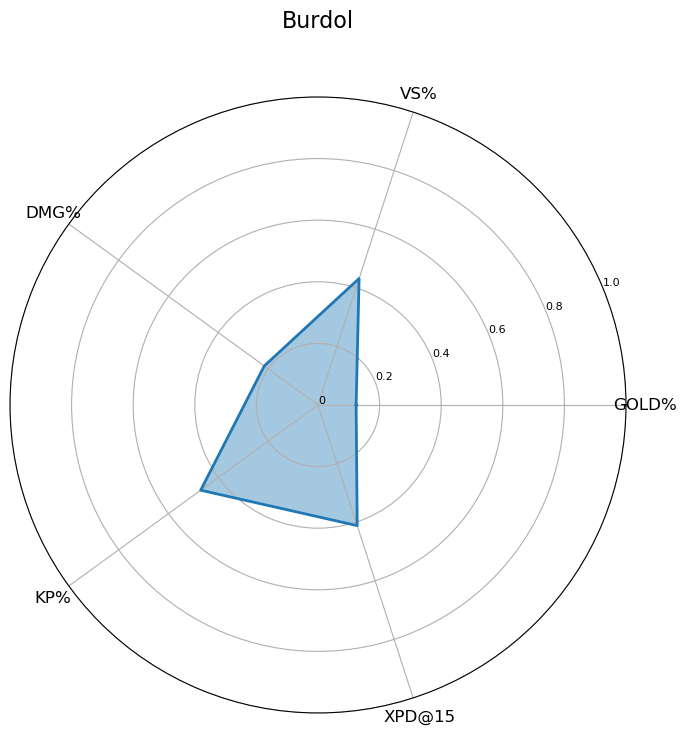

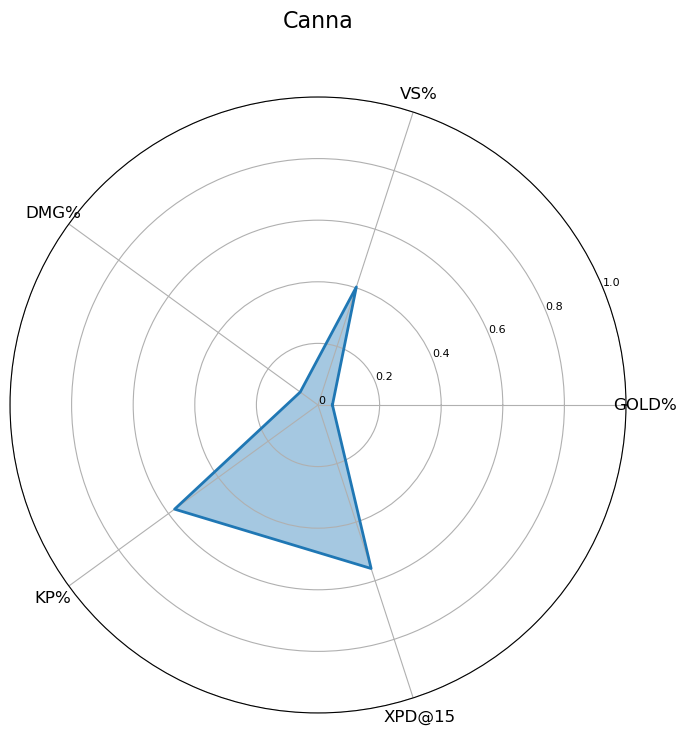

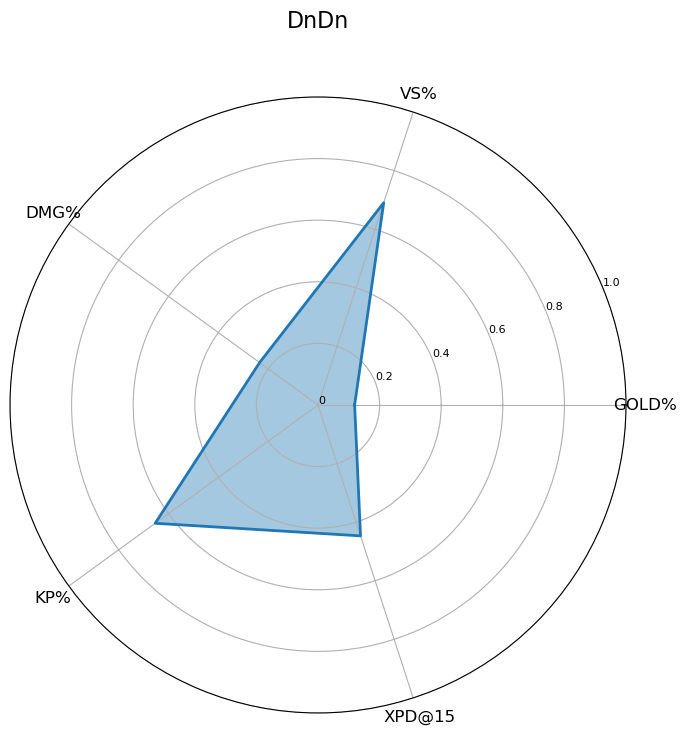

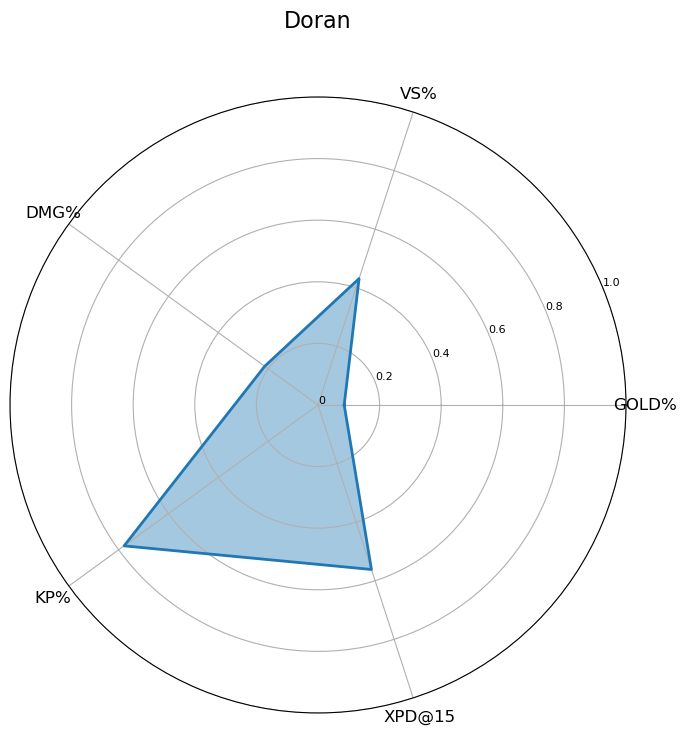

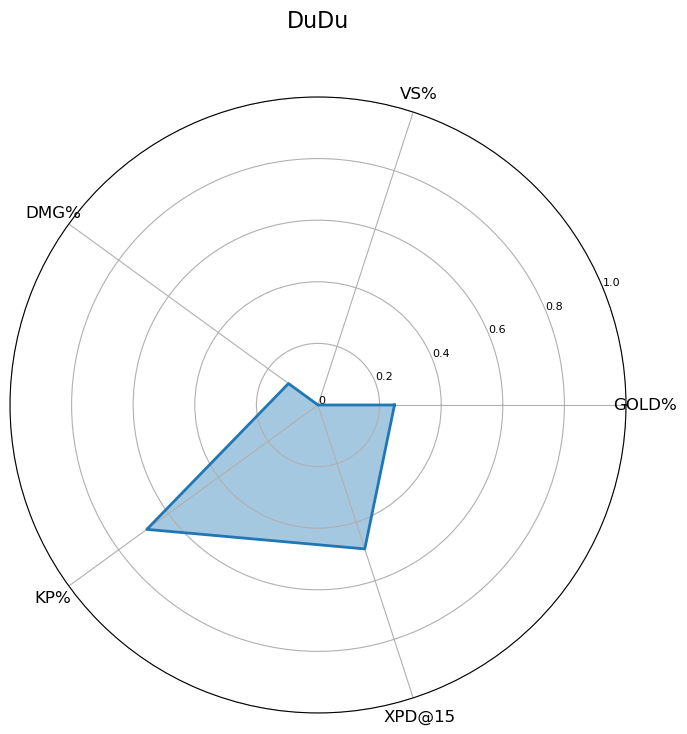

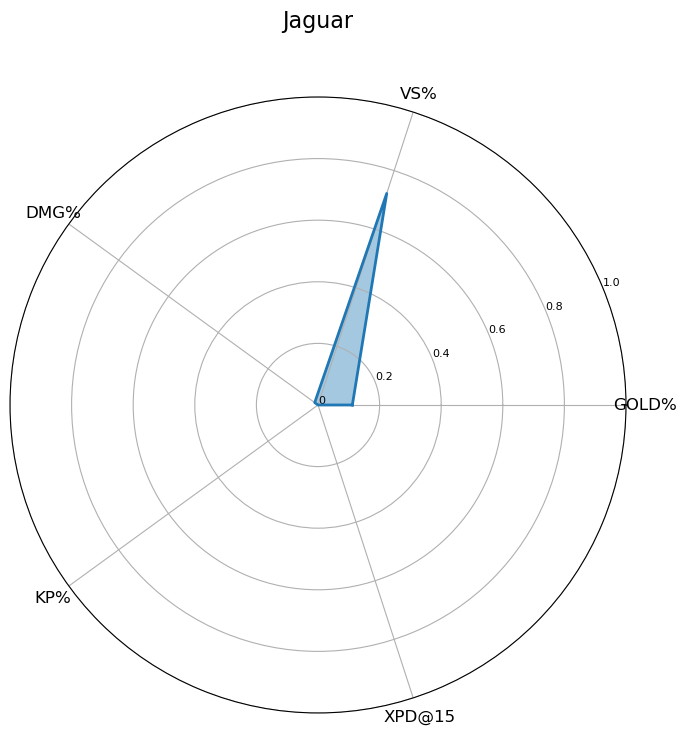

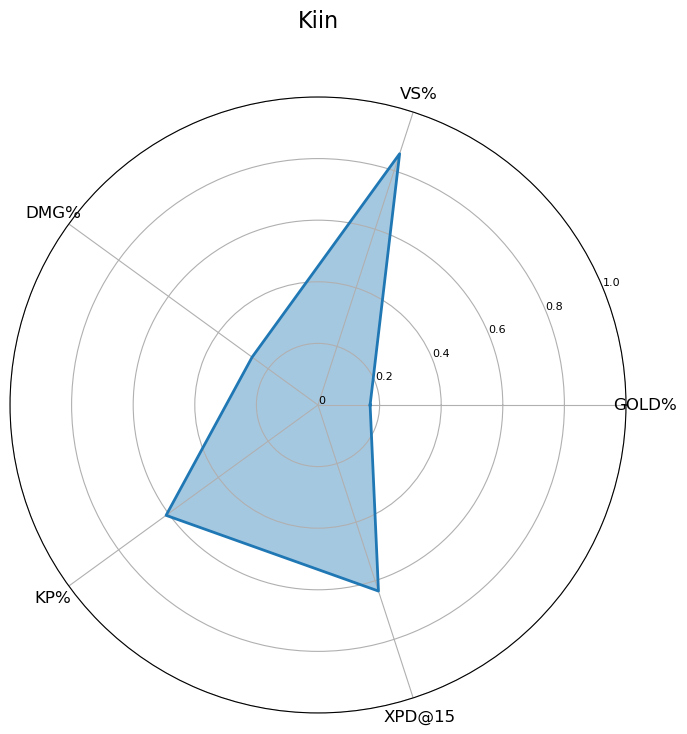

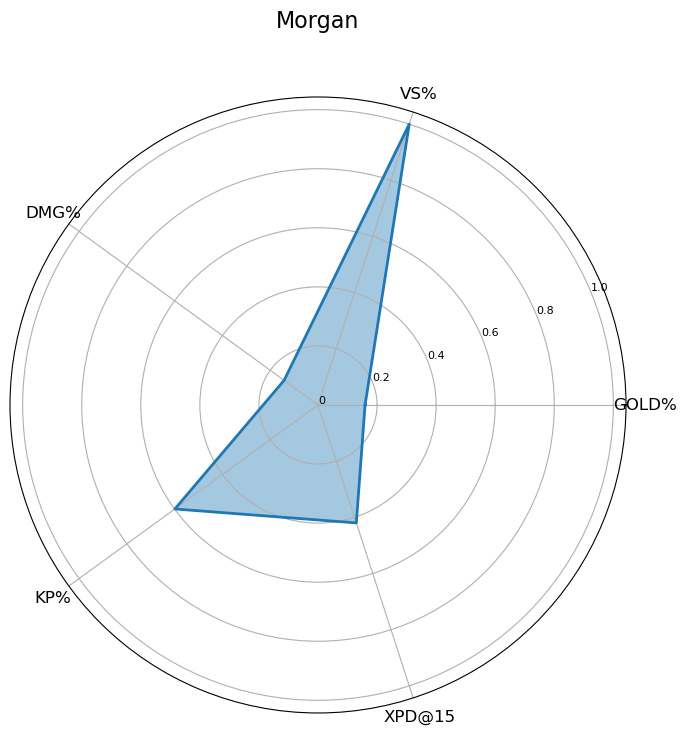

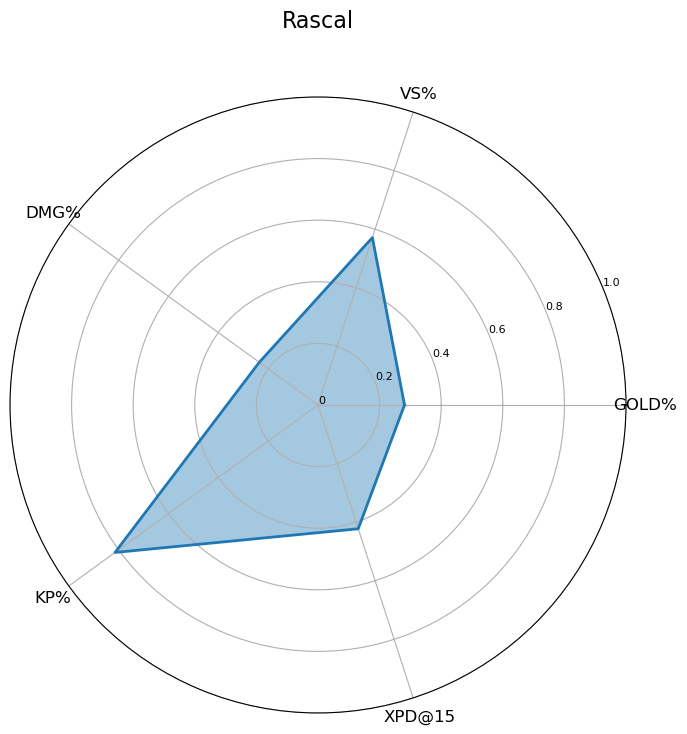

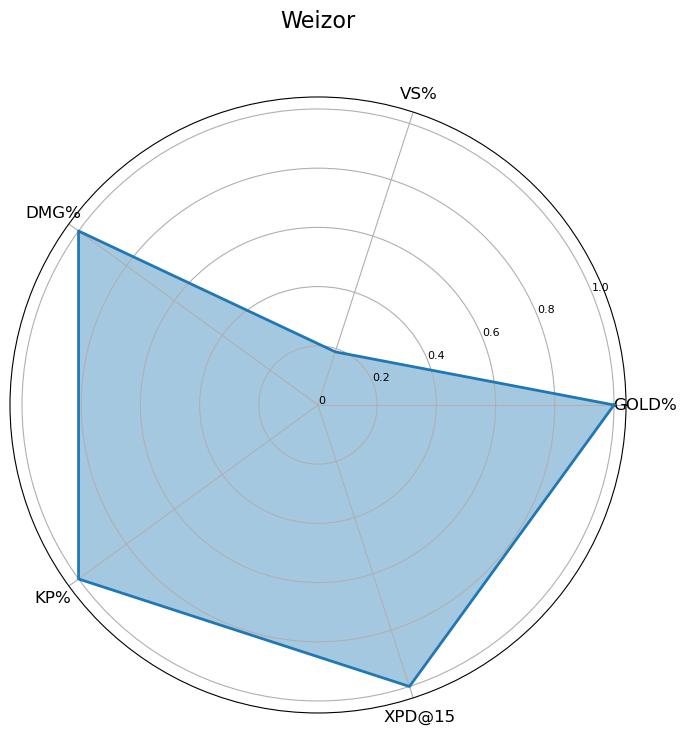

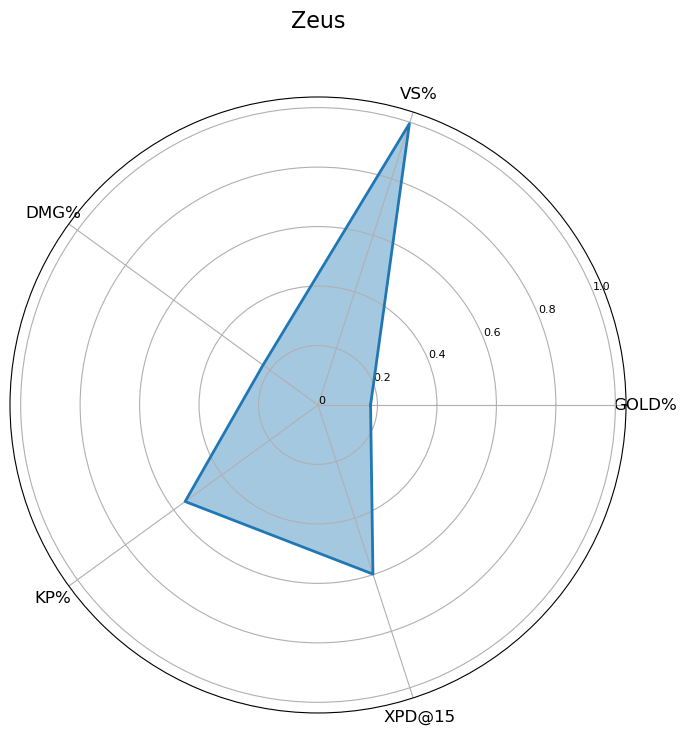

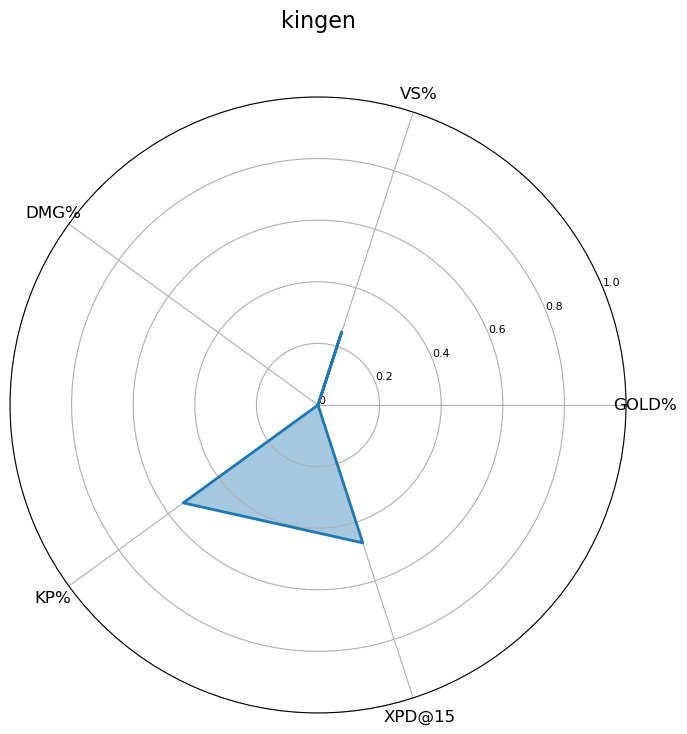

In [25]:
import matplotlib.pyplot as plt


attributes = list(scaled_df.columns)

def plot_radar_chart(player_name, data, attributes):
    values = data.loc[player_name].tolist()
    values += values[:1]

    angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], attributes, fontsize=12)
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    plt.yticks(np.arange(0, 1.1, 0.2), ["0", "0.2", "0.4", "0.6", "0.8", "1.0"], size=8)
    plt.title(player_name, size=16, y=1.1)
    plt.show()

for player in df.index:
    plot_radar_chart(player, scaled_df, attributes)

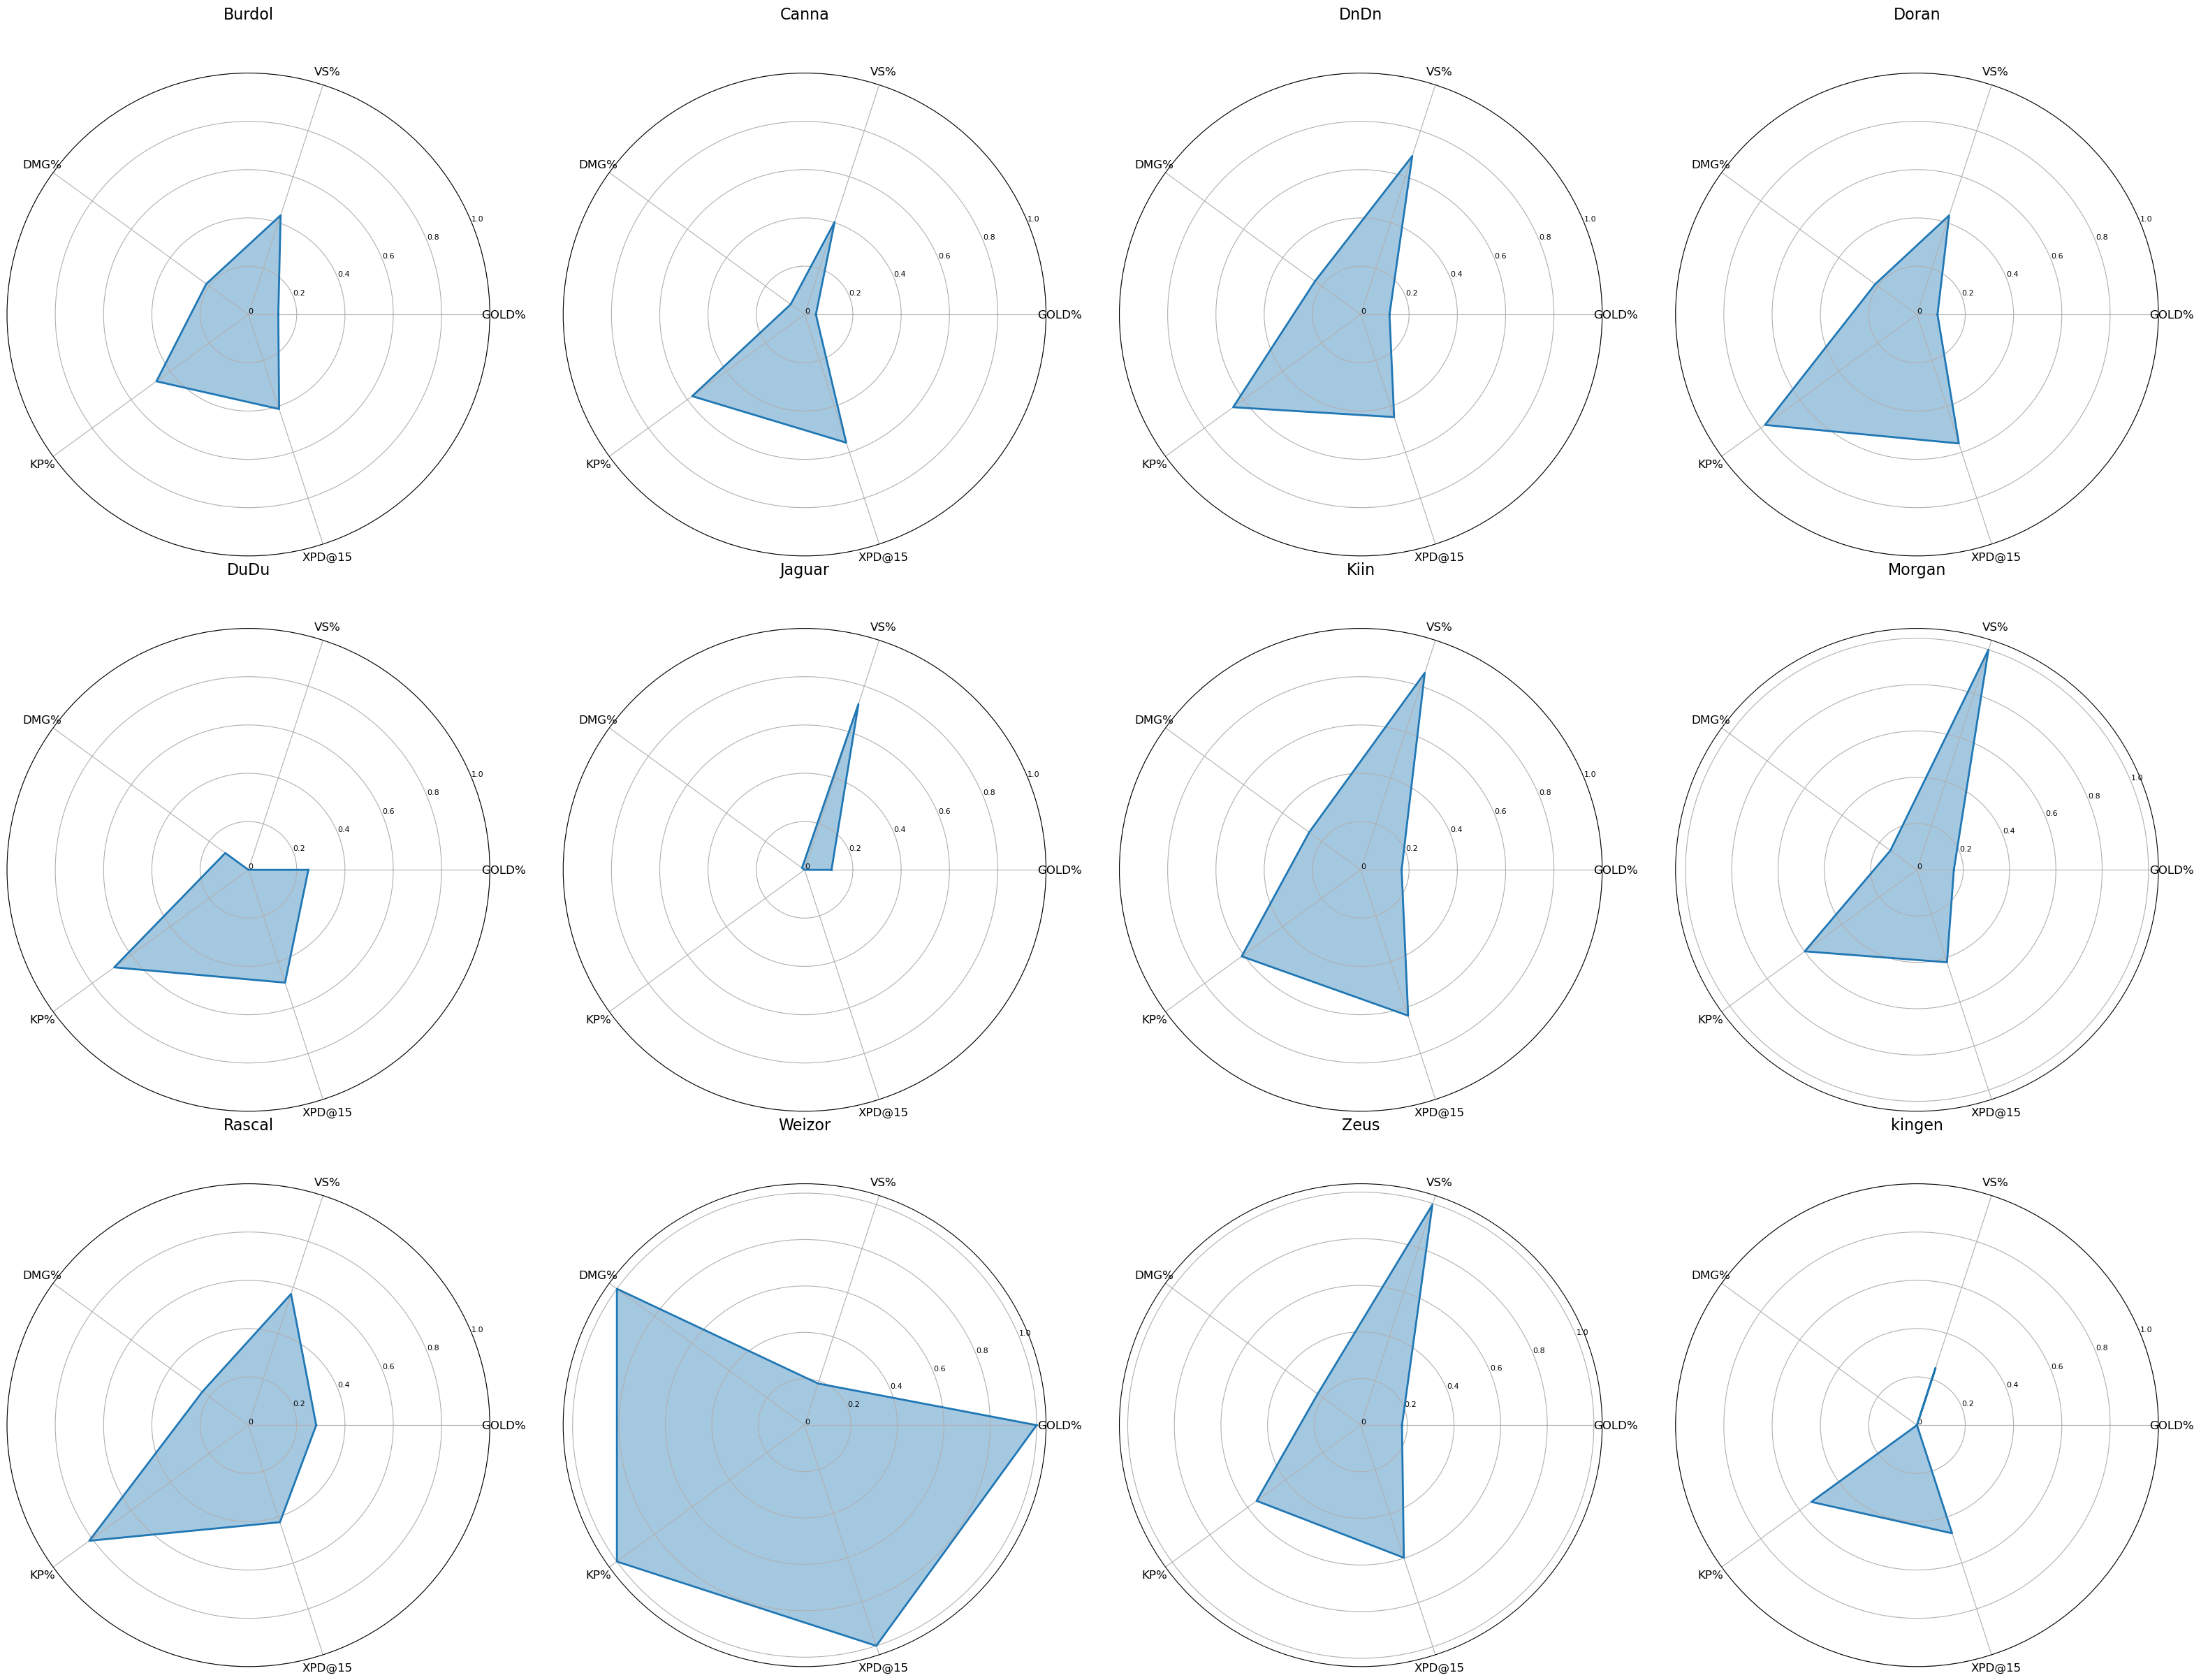

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def plot_radar_chart(ax, player_name, data, attributes):
    values = data.loc[player_name].tolist()
    values += values[:1]
    
    angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
    angles += angles[:1]
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(attributes, fontsize=12)
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    ax.set_yticks(np.arange(0, 1.1, 0.2))
    ax.set_yticklabels(["0", "0.2", "0.4", "0.6", "0.8", "1.0"], size=8)
    ax.set_title(player_name, size=16, y=1.1)

# Calculate the number of rows and columns needed based on the number of players
num_players = len(df.index)
num_cols = int(np.ceil(np.sqrt(num_players)))
num_rows = int(np.ceil(num_players / num_cols))

plt.figure(figsize=(8*num_cols, 8*num_rows))

for idx, player in enumerate(df.index):
    ax = plt.subplot(num_rows, num_cols, idx+1, polar=True)
    plot_radar_chart(ax, player, scaled_df, attributes)

plt.tight_layout()
plt.show()


# 3. 비슷한 선수 식별
- 유클리드 거리 사용

In [ ]:
input_data = {'GOLD%': 21.0, 'VS%': 12.0, 'DMG%': 23.0, 'KP%': 55.0}

In [ ]:
def calculate_euclidean_distance(row, input_data):
    return np.sqrt(np.sum([(row[col] - input_data[col]) ** 2 for col in input_data.keys()]))

In [ ]:
average_stats['Distance'] = average_stats.apply(calculate_euclidean_distance, axis=1, input_data=input_data)

In [ ]:
similar_player = average_stats[average_stats['Distance'] == average_stats['Distance'].min()]['Player'].iloc[0]
print(f"Most similar player to the input data is: {similar_player}")

Most similar player to the input data is: Doran


In [ ]:
similarity_score = 1 / (1 + average_stats[average_stats['Player'] == similar_player]['Distance'].iloc[0])
print(similarity_score)

0.413711384923736


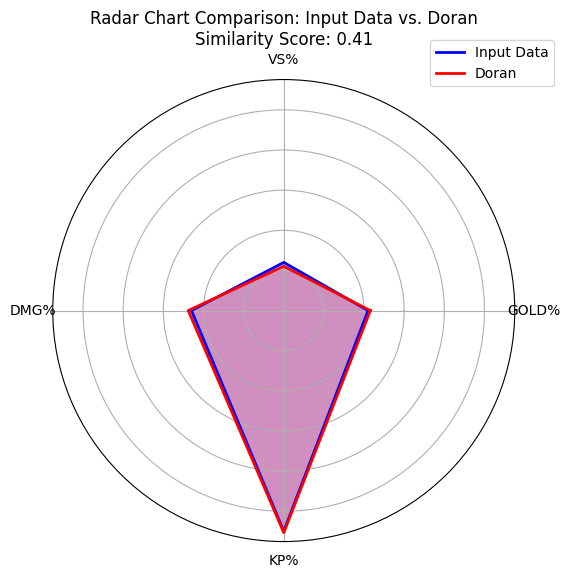

In [ ]:
labels = list(input_data.keys())
num_vars = len(labels)

# 각도 계산
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Radar chart expects the data for each variable to be in a clockwise direction but our angles
# currently start at the x-axis. By rotating the angles by pi/2 radians, we start at the y-axis.
angles += angles[:1]

# Fetching data
similar_player_data = average_stats[average_stats['Player'] == similar_player].iloc[0].to_dict()
input_data_values = list(input_data.values())
similar_player_values = [similar_player_data[label] for label in labels]

# Make sure data wraps around
input_data_values += input_data_values[:1]
similar_player_values += similar_player_values[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, input_data_values, color='blue', linewidth=2, label="Input Data")
ax.fill(angles, input_data_values, color='blue', alpha=0.25)
ax.plot(angles, similar_player_values, color='red', linewidth=2, label=similar_player)
ax.fill(angles, similar_player_values, color='red', alpha=0.25)

# Formatting the chart
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title(f"Radar Chart Comparison: Input Data vs. {similar_player}\nSimilarity Score: {similarity_score:.2f}")
ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

plt.show()